In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /Users/nirugidla/opt/anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.4                |   py37hc8dfbb8_2         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                4.8.4-py37hc8dfbb8_0 --> 4.8.4-py37hc8dfbb8_2



conda-4.8.4          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Libraries imported.


# Make-up products

In [3]:
path ='/Users/nirugidla/Downloads/products.csv'
makeup_df = pd.read_csv(path, encoding = "ISO-8859-1")
makeup_df.head()

,ID,brand,name,product_type,img,rating,dupes,description,shade_img,price_site,view_count
0,1,Butter London,Handbag Holiday Cutile Oil,\nTreatment\n,NaN,NaN,NaN,"With added vitamins A and E, this heavenly-sme...",NaN,NaN,0
1,2,Butter London,LIPPY,\nLipgloss\n,NaN,NaN,NaN,Lippy: British slang for someone who makes imp...,"[{""shade"":""Come to Bed Red"",""img"":""https://www...",NaN,0
2,3,Butter London,Hardwear P.D. Quick Top Coat,\nTop Coat\n,NaN,NaN,NaN,"Lock your lacquer. butter LONDON's quick-dry, ...",NaN,NaN,0
3,4,Butter London,Horse Power Nail Fertilizer,\nTreatment\n,NaN,NaN,NaN,Reap what you sow. butter LONDON's Nail Fertil...,NaN,NaN,0
4,5,Butter London,Kitten Heels Powder Finish Foot Creme,\nCream\n,NaN,NaN,NaN,"Kitten Heels, our miraculous Powder Finish Foo...",NaN,NaN,0


In [4]:
# Shape of the Dataframe
makeup_df.shape

(10667, 11)

In [5]:
# Remove the columns that are mostly NaN and or missing and don't give quality consistent information
makeup_df.drop(columns = ["img", "rating", "dupes", 
                         "price_site", "view_count", "shade_img", "ID"], inplace=True)
makeup_df.head()

,brand,name,product_type,description
0,Butter London,Handbag Holiday Cutile Oil,\nTreatment\n,"With added vitamins A and E, this heavenly-sme..."
1,Butter London,LIPPY,\nLipgloss\n,Lippy: British slang for someone who makes imp...
2,Butter London,Hardwear P.D. Quick Top Coat,\nTop Coat\n,"Lock your lacquer. butter LONDON's quick-dry, ..."
3,Butter London,Horse Power Nail Fertilizer,\nTreatment\n,Reap what you sow. butter LONDON's Nail Fertil...
4,Butter London,Kitten Heels Powder Finish Foot Creme,\nCream\n,"Kitten Heels, our miraculous Powder Finish Foo..."


In [6]:
# Information about the dataframe
makeup_df.dtypes

makeup_df.info()

makeup_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         10667 non-null  object
 1   name          10667 non-null  object
 2   product_type  10655 non-null  object
 3   description   10667 non-null  object
dtypes: object(4)
memory usage: 333.5+ KB


,brand,name,product_type,description
count,10667,10667,10655,10667
unique,423,9989,132,9995
top,e.l.f.,Eyeshadow,\nPowder\n,Intensify and add depth to your eyes with thes...
freq,526,51,1005,60


In [7]:
makeup_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         10667 non-null  object
 1   name          10667 non-null  object
 2   product_type  10655 non-null  object
 3   description   10667 non-null  object
dtypes: object(4)
memory usage: 333.5+ KB


In [8]:
makeup_df.describe() # doesn't give up any info because the dtype is object 

,brand,name,product_type,description
count,10667,10667,10655,10667
unique,423,9989,132,9995
top,e.l.f.,Eyeshadow,\nPowder\n,Intensify and add depth to your eyes with thes...
freq,526,51,1005,60


In [9]:
#makeup_df.groupby(by='product_type').size()

In [10]:
makeup_df['product_type'] = makeup_df['product_type'].str.strip('\n')

In [11]:
makeup_df['product_type'] = makeup_df['product_type'].str.replace('\n', '')

In [12]:
makeup_df['product_type'] = makeup_df['product_type'].str.strip()

In [13]:
makeup_df.isnull().sum()

brand            0
name             0
product_type    12
description      0
dtype: int64

In [14]:
makeup_df[pd.isnull(makeup_df['product_type'])]

,brand,name,product_type,description
6205,Lipstick Queen,Let Them Eat Cake Lipstick,NaN,Lipstick Queen Let Them Eat Cake Lipstick reta...
6651,Shiseido,I60 Natural Deep Ivory,NaN,Shiseido I60 Natural Deep Ivory is a Foundation.
6652,Shiseido,B100 Very Deep Beige,NaN,Shiseido B100 Very Deep Beige is a Foundation.
7232,Clarins,UV Plus Multi-Protection Broad Spectrum SPF 50,NaN,Clarins' multiprotection sunscreenÃ¢â¬âwith...
7283,MAX FACTOR,75 Golden,NaN,MAX FACTOR 75 Golden is a Foundation.
7439,YSL,Rose Folk (43),NaN,YSL Rose Folk (43) is a Lipgloss.
7929,Becca,Pearl,NaN,"Water, Glycerin, Ethylhexyl Methoxycinnamate, ..."
7930,Becca,Moonstone,NaN,"Water, Glycerin, Ethylhexyl Methoxycinnamate, ..."
7931,Becca,Opal,NaN,"Water, Glycerin, Ethylhexyl Methoxycinnamate, ..."
10323,Colour Pop,Kiss and Tell,NaN,Colour Pop Kiss and Tell is a Eye Palette.


In [15]:
#Nan = makeup_df[pd.isnull(makeup_df['product_type'])]
#Nan

In [16]:
#Fixing NaN Data
makeup_df.loc[6205]['product_type'] = 'Lipstick'
makeup_df.loc[6651]['product_type'] = 'Foundation'
makeup_df.loc[6652]['product_type'] = 'Foundation'
makeup_df.loc[7232]['product_type'] = 'Sunscreen'
makeup_df.loc[7283]['product_type'] = 'Foundation'
makeup_df.loc[7232]['product_type'] = 'Sunscreen'
makeup_df.loc[7439]['product_type'] = 'Lipgloss'
makeup_df.loc[7929]['product_type'] = 'Highlighter'
makeup_df.loc[7930]['product_type'] = 'Highlighter'
makeup_df.loc[7931]['product_type'] = 'Highlighter'
makeup_df.loc[10323]['product_type'] = 'Eyeshadow'
makeup_df.loc[10453]['product_type'] = 'Eyeshadow'
makeup_df.loc[10454]['product_type'] = 'Eyeshadow'

In [17]:
makeup_df.dropna(axis=0, inplace=True) #Drop everything that has NaN

In [18]:
makeup_df.isnull().sum()

brand           0
name            0
product_type    0
description     0
dtype: int64

In [19]:
makeup_df.shape

(10667, 4)

In [20]:
from collections import Counter
Counter(" ".join(makeup_df["product_type"]).split()).most_common(10)

[('Powder', 1345),
 ('Eye', 1303),
 ('Face', 1030),
 ('Liquid', 939),
 ('Cream', 898),
 ('Palette', 869),
 ('Pencil', 484),
 ('Lipstick', 380),
 ('Pressed', 371),
 ('Concealer', 364)]

In [21]:
makeup_df[['brand', 'product_type']].groupby(['brand']).count().nlargest(10, 'product_type')

,product_type
brand,
e.l.f.,526
MAC,522
Sephora,513
BH Cosmetics,391
L'Oreal,322
Make Up For Ever,319
NYX,244
Dior,235
Inglot,227


In [22]:
#makeup_df['product_type'].unique()

In [23]:
# How many different 'product_type' are there? there are 121 different "product_type"
(makeup_df.groupby('product_type').size()).shape

(122,)

In [24]:
#makeup_df[makeup_df['product_type']=='Tinted']

In [25]:
#makeup_df.groupby('product_type').size().sort_values(ascending=False)

In [26]:
#makeup_df.name.value_counts()

In [27]:
#makeup_df[makeup_df['name'].duplicated()].groupby('name').size()

In [28]:
#makeup_df[makeup_df['description'].str.contains('cleanser')]

In [29]:
makeup_df[makeup_df['product_type']=='Eyes']

,brand,name,product_type,description
7644,By Terry,LiftessenceÃÂ® Eye Contour,Eyes,"This anti-aging, lifting and firming eye conto..."
8142,Sephora,Waterproof Eye Makeup Remover,Eyes,A waterproof eye makeup remover suitable for c...
8143,Sephora,Targeted Eye Remover Swabs,Eyes,A convenient and precise makeup remover for to...
8145,Sephora,Instant Eye Makeup Remover,Eyes,A refreshing eye makeup remover gentle enough ...
8149,Sephora,Detox It Out: Charcoal Swabs,Eyes,A set of 30 charcoal swabs for a variety of co...
8154,Sephora,Black Magic Set of 2 Makeup Remover Cloths,Eyes,A set of two machine-washable wash cloths that...
8196,Sephora,Total Age Defy Cream for Eyes & Lips,Eyes,A complete age-defying eye and lip contour car...
8231,Sephora,Instant Depuffing Roll-On Gel,Eyes,A moisturizing formula in a roll-on applicator...
8839,Rouge Bunny Rouge,Eye Gloss,Eyes,Your eyes and brows will dazzle with drops of ...
8932,e.l.f.,Eye Refresh,Eyes,The cooling sensation of the Eye Refresh rolle...


## Making good labels for the column Product type

In [30]:
# Labels that are not descriptive 
bad = ['Baked', 'Defining', 'Dramatic', 'Powder',
       'Dye', 'Felt-Tip', 'Tinted', 'Stain', 
       'Stick', 'Wax', 'Pressed', 'Pot',
      'Plumping', 'Pen\n','Natural', 'Mineral', 
      'Treatment','Mask', 'Lengthening', 'Peel', 
       'Nail\n', 'Mousse', 'Thickening',
      'Loose', 'Liquid', 'Gel', 'Kits & Sets', 
      'Hands & Nails', 'Hydrating', 'Foaming', 
      'Face\n', 'Glitter', 'Eyes\n', 'Eye\n', 'Eyes',
       'Dual-Ended', 'Face', 'Makeup', 'Pencil', '\nCream', 'Cream']

In [31]:
# Bad 'product_type' labels
bad_label = makeup_df[makeup_df["product_type"].str.contains('|'.join(bad))]
bad_label.head()

,brand,name,product_type,description
0,Butter London,Handbag Holiday Cutile Oil,Treatment,"With added vitamins A and E, this heavenly-sme..."
3,Butter London,Horse Power Nail Fertilizer,Treatment,Reap what you sow. butter LONDON's Nail Fertil...
4,Butter London,Kitten Heels Powder Finish Foot Creme,Cream,"Kitten Heels, our miraculous Powder Finish Foo..."
6,Butter London,Melt Away Cuticle Eliminator,Treatment,"Out with the old, as they say. Melt Away break..."
18,Bobbi Brown,Beach Shower Gel,Gel,This moisturizing body cleanser is specially f...


In [32]:
print(bad_label.shape)

(6068, 4)


In [33]:
# Fixing error in the spelling
bad_label.loc[0]['name'] = 'Handbag Holiday Cuticle Oil'

In [34]:
condition_1 = ['Brush', 'Mascara', 'Cuticle Oil', 'Cuticle', 'Nail',
               'Shower Gel', 'Cleanser', 'moisturizer', 
              'Eyeliner', 'Eye Liner', 'Serum', 'Soap', 'Bronzer', 'Brow',
               'Stain','Concealer', 'Primer', 'Shine', 'Hand Cream',
              'Cleansing Oil', 'Eye Shadow', 'Eyeshadow',
               'Blotting Papers', 'Blotting', 'Paper',
              'Blush', 'Body', 'Lip Paint', 
              'Glitters', 'Eyecolor', 'Lip Color', 'Lip Balm', 
              'Wash', 'Highlighter', 'Lip Tar', 'Masque', 
              'rinse-off', 'Cleansing', 'hair', 'body', 'dye', 
              'Lip stain', 'lash', 'Eye Pencil', 'Eye Pen', 'Foundation', 
              'Lipliner', 'Coat', 'removes make-up', 'anti-fungal treatment', 
              'liquid liner', 'mask', 'Foam', 'Foaming', 'Lipstick', 
               'felt-tip', 'Lip Cream', 'Bronzing', 'Scrub',
               'makeup remover', 'Eye Definer', 
               'Concealer', 'Brightening Liner Duo', 'Eye Lining',
               'Mist', 'Eye Marker', 'Mattifier', 'Toner', 'Spray',
              'Glitter', 'Sponge', 'Loose Powder',
              'Mask', ' Highlighting', 'Face Palette', 'Liner', 'Lip', 'Pencil', 'Cream']

In [35]:
# Iterate through each row of bad_df and create a column based on condition 1
my_prod_type = []
for _,row in bad_label.iterrows():
    found = False
    for elm in condition_1:
        if elm.lower() in row['name'].lower() or elm.lower() in row['description'].lower():
            my_prod_type.append(elm)
            found = True
            break
    if not found:
        my_prod_type.append('missing')

len(my_prod_type)     

6068

In [36]:
bad_label['my_prod_type'] = my_prod_type

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
#Fixing a few labels
bad_label.loc[411]['my_prod_type'] = 'Pigment'
bad_label.loc[3251]['my_prod_type'] = 'Pigment'
bad_label.loc[3935]['my_prod_type'] = 'Pigment'
bad_label.loc[5865]['my_prod_type'] = 'Pigment'
bad_label.loc[10491]['my_prod_type'] = 'Hightlighter'
bad_label.loc[8250]['my_prod_type'] = 'Moisturizer'
bad_label.loc[2619]['my_prod_type'] = 'Eyeliner'
bad_label.loc[7763]['my_prod_type'] = 'Lipstick'
bad_label.loc[8652]['my_prod_type'] = 'Concealer'

In [38]:
bad_label[bad_label['my_prod_type']=='missing'].shape

(813, 5)

In [39]:
missing = bad_label[bad_label['my_prod_type']=='missing']
missing.head()

,brand,name,product_type,description,my_prod_type
4,Butter London,Kitten Heels Powder Finish Foot Creme,Cream,"Kitten Heels, our miraculous Powder Finish Foo...",missing
20,Bobbi Brown,Brightening Finishing Powder,Pressed Finishing,This all-over powder instantly illuminates and...,missing
91,Bobbi Brown,Sheer Finish Pressed Powder,Pressed Finishing,"Bobbi's long-lasting, super-sheer powder sets ...",missing
104,Bobbi Brown,Vitamin Enriched Face Base,Cream,Bobbi recommends this as the first step to pre...,missing
112,Inglot,AMC Multicolour System Powder FB Matte,Powder,"Vitamin E, treated pigments and micas helps th...",missing


In [40]:
missing.shape

(813, 5)

In [41]:
condition_2 = ['Face Palette', 'Mask', 'Pressed Powder',
              'Loose Powder', 'Dye', 'Face', 
              'Shadow', 'Eye Sticks', 'Kajal Crayon',
               'Colour Balm', 'Make Up Remover',
              'Skinfinish', 'High-Light', 'Eye Colour',
              'Highlight Powder', 'Cheek Color', 'Eye Color',
              'Eyes Refill Pan', 'Ready Color Boost', 'Mineral Glow Pearls',
               'Pigment', 'Highlighting Powder', 'Contour', 'Multicolour System Powder',
               'Warm Glow', 'Sculpting Powder', 'Shimmering Powder', 'Luminizing Powder',
               'Luminizer', 'Celestial Powder', 'Illuminator', 'Strobe Lighting Powder',
               'Silk Powder', 'Bronze-n-Brighten', 'Transforming Pearl Shade', 
               'Sculpt and Shape Powder Duo', 'Nude Powder', 'Transforming Pearl Shade',
               'Beauty Powder', 'Fantastic Powder', 'Brightening Powder', 
               'Fantastic Powder', 'Illuminating Powder', 'Shimmer Palette',
               'Shade Powder', 'Terracotta Joli Teint', 'Foot Butter',
              'Wrinkle Concentrate', 'Hydrating Hand', 'Skin Repair Complex', 
              'Moisture Defense Antioxidant', 'Sublimage', 'Anti-Wrinkle', 
               'SPF 50', 'Advanced Time', 'Eye Gloss', 'Sculpting Stick', 
              'Dream Matte Mousse', 'Filmstar Glow', 'Skin Care',
              'Sunscreen', 'Vitalumiere Aqua', 'Lotion', 'Concealing',
              'Sheer Satin', 'Mousse', 'Foot', 'Wrinkle', 'Absolue',
              'Renergie', 'Repair', 'Hydra Life', 'Moisture', 'Hydration Protection',
              'Brilliant Cells', 'Essence', 'Anti-Aging', 'Night']

In [42]:
my_prod_type = []
for _,row in missing.iterrows():
    found = False
    for elm in condition_2:
        if elm.lower() in row['name'].lower() or elm.lower() in row['product_type'].lower():
            my_prod_type.append(elm)
            found = True
            break
    if not found:
        my_prod_type.append('missing')

len(my_prod_type)   

813

In [43]:
missing['my_prod_type'] = my_prod_type

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
missing[missing['my_prod_type']=='missing'].shape

(427, 5)

In [45]:
# Individually fixing product type in 'missing' df
missing.loc[1159]['my_prod_type'] = 'Moisturizer'
missing.loc[8257]['my_prod_type'] = 'Moisturizer'
missing.loc[7657]['my_prod_type'] = 'Moisturizer'
missing.loc[6969]['my_prod_type'] = 'Foundation'
missing.loc[6752]['my_prod_type'] = 'Eye Liner'
missing.loc[1401]['my_prod_type'] = 'Moisturizer'
missing.loc[2117]['my_prod_type'] = 'Hair Gel'
missing.loc[2119]['my_prod_type'] = 'Hair Gel'
missing.loc[2121]['my_prod_type'] = 'Hair Gel'
missing.loc[2128]['my_prod_type'] = 'Hair Gel'
missing.loc[2129]['my_prod_type'] = 'Hair Gel'
missing.loc[2131]['my_prod_type'] = 'Hair Gel'
missing.loc[10450]['my_prod_type'] = 'Hair Gel'
missing.loc[546]['my_prod_type'] = 'Loose Setting'
missing.loc[638]['my_prod_type'] = 'Blush'
missing.loc[1271]['my_prod_type'] = 'Exfoliators & Scrubs'
missing.loc[5789]['my_prod_type'] = 'Eyeliner'
missing.loc[3328]['my_prod_type'] = 'Eyeliner'
missing.loc[10449]['my_prod_type'] = 'Eyeshadow'
missing.loc[10450]['my_prod_type'] = 'Eyeshadow'
missing.loc[10459]['my_prod_type'] = 'Eyeshadow'
missing.loc[5579]['my_prod_type'] = 'Glitter'
missing.loc[7502]['my_prod_type'] = 'Glitter'
missing.loc[10614]['my_prod_type'] = 'Glitter'
missing.loc[10108]['my_prod_type'] = 'Pigment'
missing.loc[4849]['my_prod_type'] = 'Foundation'
missing.loc[4914]['my_prod_type'] = 'Foundation'
missing.loc[5969]['my_prod_type'] = 'Foundation'
missing.loc[2423]['my_prod_type'] = 'Blush'
missing.loc[2701]['my_prod_type'] = 'Bronzer'
missing.loc[1861]['my_prod_type'] = 'Moisturizer'

In [46]:
replace_dict = {'Liquid': 'Foundation', 'Mineral': 'Foundation', 
                'Tinted Moisturizer': 'Foundation', 'Loose': 'Loose Powder',
               'Loose Finishing': 'Loose Powder', 'Hydrating': 'Moisturizer',
               'Treatment': 'Nails', 'Hands & Nails': 'Hand Cream',
                'Pressed Finishing': 'Pressed Powder', 'Pressed': 'Pressed Powder',
                'Pressed Setting': 'Pressed Powder','Loose Setting': 'Loose Powder',
               'Shadow': 'Eyeshadow', 'Eye Sticks':'Eyeshadow', 
                'Makeup Palette': 'Face Palette',
                'Highlight Powder': 'Highlighter', 'High-Light':'Highlighter',
                'Cheek Color': 'Blush', 'Eye Color':'Eyeshadow', 'Mineral Glow Pearls': 'Highlighter',
                'Highlighting Powder': 'Highlighter', 'Contour': 'Bronzer',
                'Eyes Refill Pan': 'Eyeshadow', 'Ready Color Boost':'Blush', 
                'Multicolour System Powder': 'Blush', 'Warm Glow': 'Blush', 
                'Sculpting Powder': 'Highlighter', 'Shimmering Powder': 'Highlighter',
                'Luminizing Powder': 'Highlighter', 'Luminizer': 'Highlighter', 
                'Celestial Powder': 'Highlighter', 'Illuminator': 'Highlighter',
                'Strobe Lighting Powder': 'Highlighter', 'Silk Powder': 'Highlighter',
                'Bronze-n-Brighten': 'Bronzer', 'Transforming Pearl Shade': 'Highlighter',
                'Sculpt and Shape Powder Duo': 'Bronzer', 'Nude Powder': 'Bronzer',
                'Transforming Pearl Shade': 'Highlighter', 'Beauty Powder': 'Highlighter',
                'Fantastic Powder': 'Highlighter', 'Brightening Powder': 'Highlighter',
                'Fantastic Powder': 'Highlighter', 'Illuminating Powder': 'Highlighter',
                'Shimmer Palette': 'Highlighter', 'Shade Powder': 'Bronzer',
                'Terracotta Joli Teint': 'Bronzer', 'Eye Cream': 'Eye Cream',
                'BB Cream': 'Foundation', 'Foot Butter': 'Lotion',
                'Foot Creme': 'Lotion', 'Wrinkle Concentrate': 'Moisturizer',
                'Hydrating Hand': 'Lotion', 'Skin Repair Complex': 'Moisturizer',
                'Moisture Defense Antioxidant': 'Moisturizer', 'Sublimage': 'Moisturizer',
                'Anti-Wrinkle': 'Moisturizer', 'SPF 50':'Sunscreen', 
                'Advanced Time': 'Moisturizer', 'Eye Gloss':'Eyeshadow',
                'Sculpting Stick': 'Bronzer', 'Dream Matte Mousse':'Foundation', 
                'Filmstar Glow':'Highlighter', 'Skin Care':'Moisturizer',
                'Vitalumiere Aqua': 'Concealer', 'Lotion': 'Lotion',
                'Concealing': 'Concealer', 'Sheer Satin': 'Foundation',
                'Mousse': 'Foundation', 'Foot':'Lotion', 'Wrinkle':'Moisturizer',
                'Absolue':'Moisturizer', 'Renergie': 'Moisturizer', 
                'Repair': 'Moisturizer', 'Hydra Life':'Moisturizer',
                'Moisture':'Moisturizer', 'Brilliant Cells': 'Moisturizer', 
                'Essence': 'Serum', 'Anti-Aging': 'Moisturizer',
                'Night':'Moisturizer', 'Hydration Protection': 'Moisturizer',
               'Kajal Crayon': 'Eyeliner', 'Colour Balm': 'Lip Balm'} # Will be found in the product_type column

In [47]:
for _,row in missing.iterrows():
    if row['product_type'] in replace_dict:
        row['my_prod_type'] = replace_dict[row['product_type']]

In [48]:
missing[missing['my_prod_type']=='missing'].shape

(48, 5)

In [49]:
for _, row in missing.iterrows():
    if row['my_prod_type'] == 'missing':
        row['my_prod_type'] = 'Foundation'

In [50]:
missing[missing['my_prod_type']=='Foundation'].head()

,brand,name,product_type,description,my_prod_type
959,Burberry,Fresh Glow,Liquid,"Burberry Fresh Glow is a lightweight, luminous...",Foundation
1214,Chanel,Soleil Tan de Chanel Sheer Illuminating Fluid,Liquid,"Sheer, weightless liquid instantly brightens s...",Foundation
1246,Dior,Capture Totale Multi-Perfection CrÃÂ¨me,Cream,"Revolutionary and unrivaled, the Capture Total...",Foundation
1250,Dior,Capture Totale Nuit,Cream,Capture Totale deeply nourishes and revitalize...,Foundation
1251,Dior,Capture Totale Nurturing Rich CrÃÂ¨me,Cream,Capture Totale Nurturing Rich Creme delivers i...,Foundation


In [51]:
missing[missing['my_prod_type']=='missing']

,brand,name,product_type,description,my_prod_type


In [52]:
bad_label['my_prod_type'].unique()

array(['Cuticle Oil', 'Nail', 'missing', 'Cuticle', 'Shower Gel', 'Blush',
       'Brush', 'Bronzer', 'Cream', 'Mascara', 'Cleanser', 'Concealer',
       'moisturizer', 'makeup remover', 'Brow', 'Bronzing', 'Eyeliner',
       'Serum', 'Soap', 'Liner', 'Eyeshadow', 'Eye Shadow', 'Stain',
       'Cleansing Oil', 'Body', 'Shine', 'Sponge', 'Highlighter', 'Lip',
       'Lipliner', 'Lip Paint', 'Coat', 'Foundation', 'Pencil',
       'Loose Powder', 'Pigment', 'removes make-up', 'Cleansing',
       'Lipstick', 'Lip Color', 'Primer', 'Wash', 'Eyecolor', 'dye',
       'Eye Pencil', 'lash', 'anti-fungal treatment', 'Masque',
       'Eye Definer', 'liquid liner', 'Face Palette', 'Glitter', 'mask',
       'rinse-off', 'Foam', ' Highlighting', 'Lip Cream', 'Hand Cream',
       'Mist', 'Glitters', 'hair', 'Lip Balm', 'Eye Liner', 'felt-tip',
       'Lip Tar', 'Blotting', 'Eye Pen', 'Eye Lining', 'Spray', 'Scrub',
       'Toner', 'Blotting Papers', 'Moisturizer', 'Brightening Liner Duo',
       'Hig

In [53]:
replace_dict_2 = {'Cuticle Oil': 'Nails', 'Cuticle': 'Nails', 'Nail': 'Nails', 
                  'Cleanser': 'Soap', 'anti-fungal treatment': 'Nails',
                 'Foam': 'Soap', 'rinse-off': 'Soap', 'Cleansing': 'Soap', 
                  'Wash': 'Soap', 'Shower Gel': 'Soap',
                  'Prime' : "Primer", 'moisturizer': 'Moisturizer', 'Masque': 'Mask',
                  'mask': 'Mask', 'Liner':'Eyeliner', 'Lip': 'Lip Balm', 
                 'Shine': 'Primer', 'Brightening Liner Duo' : 'Eyeliner', 'felt-tip' : 'Eyeliner',
                 'Eye Liner': 'Eyeliner', 'Dye' : 'Hair Dye', 'dye': 'Hair Dye',
                 'Eye Definer': 'Eyeliner', 'Liner': 'Eyeliner', 'Cream': 'Foundation',
                 'Eye Lining': 'Eyelining', 'Shadow': 'Eyeshadow'}

In [54]:
for _,row in bad_label.iterrows():
    if row['my_prod_type'] in replace_dict_2:
        row['my_prod_type'] = replace_dict_2[row['my_prod_type']]

### Putting together bad_label with missing

In [55]:
bad_label.shape

(6068, 5)

In [56]:
missing.shape

(813, 5)

In [57]:
bad_label.head(5)

,brand,name,product_type,description,my_prod_type
0,Butter London,Handbag Holiday Cuticle Oil,Treatment,"With added vitamins A and E, this heavenly-sme...",Nails
3,Butter London,Horse Power Nail Fertilizer,Treatment,Reap what you sow. butter LONDON's Nail Fertil...,Nails
4,Butter London,Kitten Heels Powder Finish Foot Creme,Cream,"Kitten Heels, our miraculous Powder Finish Foo...",missing
6,Butter London,Melt Away Cuticle Eliminator,Treatment,"Out with the old, as they say. Melt Away break...",Nails
18,Bobbi Brown,Beach Shower Gel,Gel,This moisturizing body cleanser is specially f...,Soap


In [58]:
missing[missing['product_type']=='missing']

,brand,name,product_type,description,my_prod_type


In [59]:
missing[missing['my_prod_type']=='missing'].shape

(0, 5)

In [60]:
bad_label[bad_label['product_type']=='missing']

,brand,name,product_type,description,my_prod_type


In [61]:
bad_label[bad_label['my_prod_type']=='missing'].shape

(813, 5)

In [62]:
not_missing = bad_label[bad_label['my_prod_type']!='missing']
not_missing.shape

(5255, 5)

In [63]:
bad_df = pd.concat([missing, not_missing])
bad_df.shape

(6068, 5)

In [64]:
bad_df[bad_df['product_type']=='missing'] #it worked if nothing shows in the df

,brand,name,product_type,description,my_prod_type


### Putting together bad_df with not bad df to get makeup_df

In [65]:
bad_df.drop(columns = ["product_type"], inplace=True)
bad_df.head()

,brand,name,description,my_prod_type
4,Butter London,Kitten Heels Powder Finish Foot Creme,"Kitten Heels, our miraculous Powder Finish Foo...",Foot
20,Bobbi Brown,Brightening Finishing Powder,This all-over powder instantly illuminates and...,Pressed Powder
91,Bobbi Brown,Sheer Finish Pressed Powder,"Bobbi's long-lasting, super-sheer powder sets ...",Pressed Powder
104,Bobbi Brown,Vitamin Enriched Face Base,Bobbi recommends this as the first step to pre...,Face
112,Inglot,AMC Multicolour System Powder FB Matte,"Vitamin E, treated pigments and micas helps th...",Multicolour System Powder


In [66]:
bad_df.rename(columns={'my_prod_type':'product_type'}, 
                 inplace=True)

In [67]:
bad_df = bad_df[['brand', 'name', 'product_type', 'description']]

In [68]:
bad_df.head()

,brand,name,product_type,description
4,Butter London,Kitten Heels Powder Finish Foot Creme,Foot,"Kitten Heels, our miraculous Powder Finish Foo..."
20,Bobbi Brown,Brightening Finishing Powder,Pressed Powder,This all-over powder instantly illuminates and...
91,Bobbi Brown,Sheer Finish Pressed Powder,Pressed Powder,"Bobbi's long-lasting, super-sheer powder sets ..."
104,Bobbi Brown,Vitamin Enriched Face Base,Face,Bobbi recommends this as the first step to pre...
112,Inglot,AMC Multicolour System Powder FB Matte,Multicolour System Powder,"Vitamin E, treated pigments and micas helps th..."


### Putting together bad_df with good_label to give makeup_label

In [69]:
# Dataframe with Good 'product_type'
good_label = makeup_df[~(makeup_df["product_type"].str.contains('|'.join(bad)))]
print(good_label.shape)

(4599, 4)


In [70]:
# Dataframe with Bad 'product_type'
bad_df.shape

(6068, 4)

In [71]:
makeup_df.shape

(10667, 4)

In [72]:
final_df = pd.concat([good_label, bad_df])
final_df.shape

(10667, 4)

In [73]:
final_df.head()

,brand,name,product_type,description
1,Butter London,LIPPY,Lipgloss,Lippy: British slang for someone who makes imp...
2,Butter London,Hardwear P.D. Quick Top Coat,Top Coat,"Lock your lacquer. butter LONDON's quick-dry, ..."
5,Butter London,Matte Finish Top Coat,Top Coat,Created by butter LONDON's very own Nonie Crem...
7,Butter London,Nail File,Nail File,The butter LONDON Nail File is made from a sof...
8,Butter London,Nail Foundation Flawless Base Coat,Base Coat,"Makeup for your nails. This silk-finish, stain..."


In [74]:
#final_df[final_df['product_type']=='Eyes']

In [75]:
final_df.loc[6162]['product_type'] = 'Tools'
final_df.loc[660]['product_type'] = 'Primer'
final_df.loc[667]['product_type'] = 'Primer'
final_df.loc[673]['product_type'] = 'Primer'
final_df.loc[588]['product_type'] = 'Exfoliator'
final_df.loc[1091]['product_type'] = 'Exfoliator'
final_df.loc[8237]['product_type'] = 'Tools'
final_df.loc[569]['product_type'] = 'Tools'
final_df.loc[8226]['product_type'] = 'Hand Cream'
final_df.loc[1895]['product_type'] = 'Glitter'
final_df.loc[510]['product_type'] = 'Spray'
final_df.loc[7457]['product_type'] = 'Lipstick'
final_df.loc[9425]['product_type'] = 'Lipstick'
final_df.loc[10662]['product_type'] = 'Lipstick'
final_df.loc[7640]['product_type'] = 'Moisturizer'
final_df.loc[9150]['product_type'] = 'Moisturizer'
final_df.loc[10393]['product_type'] = 'Moisturizer'
final_df.loc[10662]['product_type'] = 'Lipstick'
final_df.loc[7156]['product_type'] = 'Lipstick'
final_df.loc[8011]['product_type'] = 'Eyeliner' 
final_df.loc[2352]['product_type'] = 'Glitter' 
final_df.loc[2653]['product_type'] = 'Brush'
final_df.loc[2654]['product_type'] = 'Brush' 
final_df.loc[2670]['product_type'] = 'Brush' 
final_df.loc[2670]['product_type'] = 'Brush' 
final_df.loc[2681]['product_type'] = 'Loose Powder' 
final_df.loc[9257]['product_type'] = 'Brush' 
final_df.loc[9266]['product_type'] = 'Pigment' 
final_df.loc[9359]['product_type'] = 'Brush' 
final_df.loc[6866]['product_type'] = 'Highlighter'
final_df.loc[7644]['product_type'] = 'Moisturizer' 
final_df.loc[9027]['product_type'] = 'Moisturizer' 
final_df.loc[8142]['product_type'] = 'Makeup Remover'
final_df.loc[8143]['product_type'] = 'Makeup Remover'
final_df.loc[8145]['product_type'] = 'Makeup Remover'
final_df.loc[8149]['product_type'] = 'Makeup Remover'
final_df.loc[8154]['product_type'] = 'Makeup Remover'

In [76]:
(final_df.groupby('product_type').size()).shape

(179,)

In [77]:
final_df[final_df['product_type']=='missing']

,brand,name,product_type,description


In [78]:
#final_df[final_df['brand']=="L'Oreal

In [79]:
(final_df['brand'].unique()).shape

(423,)

### Fixing labels in Makeup_up with replace_dict_3

In [80]:
final_df['product_type'].unique()

array(['Lipgloss', 'Top Coat', 'Nail File', 'Base Coat', 'Nail Color',
       'Polish Remover', 'Exfoliators & Scrubs', 'Moisturizer', 'Eye',
       'Lotion', 'Oil', 'Brush Cleanser', 'Facial Exfoliator', 'Lipstick',
       'Balm', 'Volumizing', 'Eyelash Curler', 'Toner', 'Lip Balm', 'Lip',
       'Tweezers', 'Lip Palette', 'Cheek Palette', 'Eye Palette', 'Wipe',
       'False Eyelashes', 'False Eyelash Adhesive', 'Mascara',
       'Fast Dry Coat', 'Tools', 'Sharpener', 'with SPF', 'Exfoliator',
       'Eyelash', 'Primer', 'Facial Mist', 'Foot Care', 'Nail Lacquer',
       'Nail', 'Body', 'Fragrance', 'Self-Tanner', 'Lip Plumper',
       'Mirror', 'Serum', "Men's Shaving", 'Deodorant', 'Hair Spray',
       'Shampoo', 'Sunscreen', 'Brush Set', 'Facial Cleanser', 'Brush',
       'Lip Liner', 'Pen', 'Lips', 'Concealer', 'Hair Tools',
       'Highlighter', 'Lip Scrub', 'Foundation', 'Blush', 'Brow',
       'Lip Oil', 'Setting Spray', 'Dry Shampoo', 'Hair', 'Skincare',
       'Bronzer', 'Fo

In [81]:
(final_df['product_type'].unique()).shape

(179,)

In [82]:
replace_dict_3 = {'Cuticle Oil': 'Nails', 'Cuticle': 'Nails', 'Nail': 'Nails', 
                  'Cleanser': 'Soap', 'anti-fungal treatment': 'Nails',
                 'Foam': 'Soap', 'rinse-off': 'Soap', 'Cleansing': 'Soap', 
                  'Wash': 'Soap', 'Shower Gel': 'Soap', 'Facial Cleanser': 'Soap',
                  'Pen': 'Concealer', 'Eye Pen': 'Eyeliner', 'Lip Plumper': 'Lipgloss',
                  'liquid liner': 'Eyeliner', 'Facial Exfoliator':'Exfoliators & Scrubs', 
                  'Exfoliator': 'Exfoliators & Scrubs', 'Lip Scrub': 'Exfoliators & Scrubs', 
                  'Scrub': 'Exfoliators & Scrubs', 'Sharpener': 'Tools', 'Nail Lacquer': 'Nails',
                  'Nail': 'Nails', 'Brush Set': 'Brush', 'Brush Cleanser': 'Tools', 
                  'Brush': 'Tools', 'Skincare': 'Moisturizer',  'Mirror': 'Tools',
                  'Prime' : "Primer", 'moisturizer': 'Moisturizer', 'Masque': 'Mask',
                  'mask': 'Mask', 'Liner':'Eyeliner', 'Lip': 'Lip Balm', 'BB Cream': 'Foundation',
                  'Sponge': 'Tools', 'Blotting':'Tools', 'Lip Paint': 'Lipstick', 
                  'Mist': 'Facial Mist', 'Stain': 'Lip Balm', ' Highlighting': 'Hightlighter',
                  'Eyelining': 'Eyeliner', 'Blotting Papers': 'Tools',
                  'Eyelash Curler': 'Tools', 'False Eyelash Adhesive': 'Tools',
                  'Lips': 'Exfoliators & Scrubs', 'Face': 'Foundation',
                  'Eyecolor': 'Eyeshadow', 'Eyeshadow Palette': 'Eyeshadow', 
                  'Eye Palette': 'Eyeshadow', 'Eyecolor': 'Eyeshadow', 
                   'Eye Shadow':'Eyeshadow', 'Nail File': 'Tools', 
                  'Tweezers': 'Tools', 'Spray':'Setting Spray', 'Lip Palette': 'Lipstick',
                  'Bronzing': 'Bronzer', 'Volumizing': 'Mascara', 'Lip Color': 'Lipstick',
                 'Shine': 'Primer', 'Brightening Liner Duo' : 'Eyeliner', 'felt-tip' : 'Eyeliner',
                 'Eye Liner': 'Eyeliner', 'Dye' : 'Hair Dye', 'dye': 'Hair Dye',
                 'Eye Definer': 'Eyeliner', 'Liner': 'Eyeliner',
                 'Eye Lining': 'Eyelining', 'Face Palette':'Makeup Palette',
                 'Peel': 'Mask', 'removes make-up': 'Makeup Remover', 
                  'Shadow' : 'Eyeshadow', 'Brush Cleanser': 'Tools', 
                  'Liquid': 'Foundation', 'Mineral': 'Foundation', 
                'Tinted Moisturizer': 'Foundation', 'Loose': 'Loose Powder',
               'Loose Finishing': 'Loose Powder', 'Hydrating': 'Moisturizer',
               'Treatment': 'Nails', 'Hands & Nails': 'Hand Cream',
                'Pressed Finishing': 'Pressed Powder', 'Pressed': 'Pressed Powder',
                'Pressed Setting': 'Pressed Powder','Loose Setting': 'Loose Powder',
               'Shadow': 'Eyeshadow', 'Eye Sticks':'Eyeshadow', 
                'Make Up Remover': 'Makeup Remover',
                'Highlight Powder': 'Highlighter', 'High-Light':'Highlighter',
                'Cheek Color': 'Blush', 'Eye Color':'Eyeshadow', 'Mineral Glow Pearls': 'Highlighter',
                'Highlighting Powder': 'Highlighter', 'Contour': 'Bronzer',
                'Eyes Refill Pan': 'Eyeshadow', 'Ready Color Boost':'Blush', 
                'Multicolour System Powder': 'Blush', 'Warm Glow': 'Blush', 
                'Sculpting Powder': 'Highlighter', 'Shimmering Powder': 'Highlighter',
                'Luminizing Powder': 'Highlighter', 'Luminizer': 'Highlighter', 
                'Celestial Powder': 'Highlighter', 'Illuminator': 'Highlighter',
                'Strobe Lighting Powder': 'Highlighter', 'Silk Powder': 'Highlighter',
                'Bronze-n-Brighten': 'Bronzer', 'Transforming Pearl Shade': 'Highlighter',
                'Sculpt and Shape Powder Duo': 'Bronzer', 'Nude Powder': 'Bronzer',
                'Transforming Pearl Shade': 'Highlighter', 'Beauty Powder': 'Highlighter',
                'Fantastic Powder': 'Highlighter', 'Brightening Powder': 'Highlighter',
                'Fantastic Powder': 'Highlighter', 'Illuminating Powder': 'Highlighter',
                'Shimmer Palette': 'Highlighter', 'Shade Powder': 'Bronzer',
                'Terracotta Joli Teint': 'Bronzer', 'Cleansing Oil':'Makeup Remover',
                  'Kajal Crayon': 'Eyeliner', 'Colour Balm': 'Lip Balm', 'Pencil': 'Eye Pencil',
                  'Skinfinish': 'Concealer', 'Paper': 'Tools', 'Lip Liner': 'Eyeliner',
                 'with SPF': 'Lip Balm', 'Lip Cream':'Lip Balm', 'Lip Tar': 'Lipgloss', 
                 'Lip Oil': 'Lip Balm', 'Wipe': 'Makeup Remover', 'Pad': 'Soap', 
                 'makeup remover': 'Makeup Remover',
                'Highlight Powder': 'Highlighter', 'High-Light':'Highlighter',
                'Cheek Color': 'Blush', 'Eye Color':'Eyeshadow', 'Mineral Glow Pearls': 'Highlighter',
                'Highlighting Powder': 'Highlighter', 'Contour': 'Bronzer',
                'Eyes Refill Pan': 'Eyeshadow', 'Ready Color Boost':'Blush', 
                'Multicolour System Powder': 'Blush', 'Warm Glow': 'Blush', 
                'Sculpting Powder': 'Highlighter', 'Shimmering Powder': 'Highlighter',
                'Luminizing Powder': 'Highlighter', 'Luminizer': 'Highlighter', 
                'Celestial Powder': 'Highlighter', 'Illuminator': 'Highlighter',
                'Strobe Lighting Powder': 'Highlighter', 'Silk Powder': 'Highlighter',
                'Bronze-n-Brighten': 'Bronzer', 'Transforming Pearl Shade': 'Highlighter',
                'Sculpt and Shape Powder Duo': 'Bronzer', 'Nude Powder': 'Bronzer',
                'Transforming Pearl Shade': 'Highlighter', 'Beauty Powder': 'Highlighter',
                'Fantastic Powder': 'Highlighter', 'Brightening Powder': 'Highlighter',
                'Fantastic Powder': 'Highlighter', 'Illuminating Powder': 'Highlighter',
                'Shimmer Palette': 'Highlighter', 'Shade Powder': 'Bronzer',
                'Terracotta Joli Teint': 'Bronzer', 'Eye Cream': 'Eye Cream',
                'BB Cream': 'Foundation', 'Foot Butter': 'Lotion',
                'Foot Creme': 'Lotion', 'Wrinkle Concentrate': 'Moisturizer',
                'Hydrating Hand': 'Lotion', 'Skin Repair Complex': 'Moisturizer',
                'Moisture Defense Antioxidant': 'Moisturizer', 'Sublimage': 'Moisturizer',
                'Anti-Wrinkle': 'Moisturizer', 'SPF 50':'Sunscreen', 
                'Advanced Time': 'Moisturizer', 'Eye Gloss':'Eyeshadow',
                'Sculpting Stick': 'Bronzer', 'Dream Matte Mousse':'Foundation', 
                'Filmstar Glow':'Highlighter', 'Skin Care':'Moisturizer',
                'Vitalumiere Aqua': 'Concealer', 'Lotion': 'Lotion',
                'Concealing': 'Concealer', 'Sheer Satin': 'Foundation',
                'Mousse': 'Foundation', 'Foot':'Lotion', 'Wrinkle':'Moisturizer',
                'Absolue':'Moisturizer', 'Renergie': 'Moisturizer', 
                'Repair': 'Moisturizer', 'Hydra Life':'Moisturizer',
                'Moisture':'Moisturizer', 'Brilliant Cells': 'Moisturizer', 
                'Essence': 'Serum', 'Anti-Aging': 'Moisturizer',
                'Night':'Moisturizer', 'Hydration Protection': 'Moisturizer',
               'Kajal Crayon': 'Eyeliner', 'Colour Balm': 'Lip Balm', 
                 'lash': 'Eyelash', 'makeup remover': 'Makeup Remover',
                 'Coat':'Nail Color', 'Glitters':'Glitter',
                 'hair':'Hair', 'Eye': 'Eyes', 
                 'Multicolour System Powder': 'Highlighter'} # Some keys are repeated

In [83]:
for _,row in final_df.iterrows():
    if row['product_type'] in replace_dict_3:
        row['product_type'] = replace_dict_3[row['product_type']]

In [84]:
final_df['product_type'].unique()

array(['Lipgloss', 'Top Coat', 'Tools', 'Base Coat', 'Nail Color',
       'Polish Remover', 'Exfoliators & Scrubs', 'Moisturizer', 'Eyes',
       'Lotion', 'Oil', 'Lipstick', 'Balm', 'Mascara', 'Toner',
       'Lip Balm', 'Cheek Palette', 'Eyeshadow', 'Makeup Remover',
       'False Eyelashes', 'Fast Dry Coat', 'Eyelash', 'Primer',
       'Facial Mist', 'Foot Care', 'Nails', 'Body', 'Fragrance',
       'Self-Tanner', 'Serum', "Men's Shaving", 'Deodorant', 'Hair Spray',
       'Shampoo', 'Sunscreen', 'Brush', 'Soap', 'Eyeliner', 'Concealer',
       'Hair Tools', 'Highlighter', 'Foundation', 'Blush', 'Brow',
       'Setting Spray', 'Dry Shampoo', 'Hair', 'Bronzer',
       'Pressed Powder', 'Loose Powder', 'Eye Cream', 'Makeup Palette',
       'Hair Dye', 'Hair Gel', 'Eye Colour', 'Glitter', 'Mask', 'Pigment',
       'Lipliner', 'Eye Pencil', 'Hightlighter', 'Hand Cream'],
      dtype=object)

In [85]:
(final_df.groupby('product_type').size()).shape

(62,)

In [86]:
# creating bins

face = ['Moisturizer', 'Toner', 'Cheek Palette',
        'Facial Mist', 'Serum', 'Concealer',
       'Highlighter', 'Primer', 'Blush',
       'Bronzer', 'Pressed Powder', 'Foundation',
       'Loose Powder',  'Makeup Palette', 'Mask', 
       'Hightlighter'] #16

eyes = ['Mascara',
      'False Eyelashes', 'Eyelash', 'Eyeshadow',
      'Eyeliner', 'Eyes', 'Brow',
      'Eye Cream', 'Eye Colour', 'Eye Pencil'] #10

body = ['Fragrance', 'Lotion', # Things that go anywhere and all over the body 
        'Exfoliators & Scrubs', 'Lotion', 'Oil', 
       'Balm', 'Body', 'Self-Tanner', 
       "Men's Shaving", 'Deodorant', 'Sunscreen',
        'Glitter', 'Pigment', 'Hand Cream',
       'Top Coat', 'Base Coat', 'Nail Color',
        'Fast Dry Coat', 'Foot Care', 'Nails',
        'Hair Spray', 'Shampoo', 'Dry Shampoo', 'Hair',
        'Hair Dye','Hair Gel'] #14+12

lips = ['Lipgloss', 'Lipstick', 'Lip Balm', 
       'Lipliner'] #4

other = ['Tools', 'Polish Remover', 'Makeup Remover',
        'Soap', 'Hair Tools', 'Setting Spray', 'Brush'] #6 

In [87]:
#foot_nails_hair = ['Top Coat', 'Base Coat', 'Nail Color',
        #'Fast Dry Coat', 'Foot Care', 'Nails',
         #         'Hair Spray', 'Shampoo', 'Dry Shampoo', 'Hair',
          #        'Hair Dye','Hair Gel' ] #12
            
            #elif row['product_type'] in foot_nails_hair:
       # category.append('Foot, Nails, Hair')

In [88]:
category = []
for _,row in final_df.iterrows():
    if row['product_type'] in face:
        category.append('Face')
    elif row['product_type'] in eyes:
        category.append('Eyes')
    elif row['product_type'] in lips:
        category.append('Lips')
    elif row['product_type'] in body:
        category.append('Body')
    elif row['product_type'] in other:
        category.append('Other')
    else:
        print(row['product_type'])

len(category)

final_df['category'] = category

In [89]:
print(final_df.shape)

(10667, 5)


### Fixing 'EYES' in final_df

In [90]:
final_df[final_df['product_type']=='Eyes']

,brand,name,product_type,description,category
14,Bobbi Brown,Angle Eye Shadow,Eyes,"Ideal for applying shadow in the corner, in th...",Eyes
27,Bobbi Brown,Concealer Blending,Eyes,Designed to be used with our Creamy Concealer ...,Eyes
29,Bobbi Brown,Cream Shadow,Eyes,The Cream Shadow Brush is the ideal tool for a...,Eyes
42,Bobbi Brown,Eye Blender,Eyes,Expertly blends all Eye Shadow shades together...,Eyes
43,Bobbi Brown,Eye Brow,Eyes,Angled brush head expertly shapes and defines ...,Eyes
44,Bobbi Brown,Eye Definer,Eyes,The Eye Definer Brush does double-duty: softly...,Eyes
45,Bobbi Brown,Eye Liner,Eyes,"For use with dark Eye Shadow shades, the Eye L...",Eyes
48,Bobbi Brown,Eye Smudge,Eyes,The tapered end of this brush is designed for ...,Eyes
103,Bobbi Brown,Ultra Fine Eyeliner,Eyes,"Easy to hold and control, this slim, tapered U...",Eyes
121,Inglot,10S Brush,Eyes,Inglot 10S Brush is a Brush that retails for $...,Eyes


In [91]:
eyes = final_df[final_df['product_type']=='Eyes']
eyes.head()

,brand,name,product_type,description,category
14,Bobbi Brown,Angle Eye Shadow,Eyes,"Ideal for applying shadow in the corner, in th...",Eyes
27,Bobbi Brown,Concealer Blending,Eyes,Designed to be used with our Creamy Concealer ...,Eyes
29,Bobbi Brown,Cream Shadow,Eyes,The Cream Shadow Brush is the ideal tool for a...,Eyes
42,Bobbi Brown,Eye Blender,Eyes,Expertly blends all Eye Shadow shades together...,Eyes
43,Bobbi Brown,Eye Brow,Eyes,Angled brush head expertly shapes and defines ...,Eyes


In [92]:
condition_4 = ['Brush', 'Eye Shadow', 'Concealer',
              'Brow', 'Definer', 'Shadow',
              'Eyeliner', 'Liner', 'Eyeliner',
              'Eye Blender', 'Primer',
              'Eyeshadow', 'Shader',
              'Eye Cream', 'Eye Gloss', 
              'Applicator', ' Mascara', 'Blending',
              'Crease']

In [93]:
my_prod_type = []
for _,row in eyes.iterrows():
    found = False
    for elm in condition_4:
        if elm in row['name']:
            my_prod_type.append(elm)
            found = True
            break
    if not found:
        my_prod_type.append('Tools')

len(my_prod_type) 

808

In [94]:
eyes['my_prod_type'] = my_prod_type

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [95]:
eyes.drop(columns = ["product_type"], inplace=True)

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [96]:
eyes.head()

,brand,name,description,category,my_prod_type
14,Bobbi Brown,Angle Eye Shadow,"Ideal for applying shadow in the corner, in th...",Eyes,Eye Shadow
27,Bobbi Brown,Concealer Blending,Designed to be used with our Creamy Concealer ...,Eyes,Concealer
29,Bobbi Brown,Cream Shadow,The Cream Shadow Brush is the ideal tool for a...,Eyes,Shadow
42,Bobbi Brown,Eye Blender,Expertly blends all Eye Shadow shades together...,Eyes,Eye Blender
43,Bobbi Brown,Eye Brow,Angled brush head expertly shapes and defines ...,Eyes,Brow


In [97]:
eyes = eyes[['brand', 'name', 'my_prod_type', 'description', 'category']]

In [98]:
eyes.head()

,brand,name,my_prod_type,description,category
14,Bobbi Brown,Angle Eye Shadow,Eye Shadow,"Ideal for applying shadow in the corner, in th...",Eyes
27,Bobbi Brown,Concealer Blending,Concealer,Designed to be used with our Creamy Concealer ...,Eyes
29,Bobbi Brown,Cream Shadow,Shadow,The Cream Shadow Brush is the ideal tool for a...,Eyes
42,Bobbi Brown,Eye Blender,Eye Blender,Expertly blends all Eye Shadow shades together...,Eyes
43,Bobbi Brown,Eye Brow,Brow,Angled brush head expertly shapes and defines ...,Eyes


In [106]:
eyes[eyes['my_prod_type']=='Eye Blender']

,brand,name,my_prod_type,description,category
42,Bobbi Brown,Eye Blender,Eye Blender,Expertly blends all Eye Shadow shades together...,Eyes
9303,Zoeva,Petit Eye Blender 223,Eye Blender,"The 223 Petit Eye Blender is a handcrafted, de...",Eyes
9304,Zoeva,Petit Eye Blender 223 (Rose Golden Vol. 2 Edit...,Eye Blender,"The 223 Petit Eye Blender is a handcrafted, de...",Eyes
9306,Zoeva,Luxe Eye Blender 225,Eye Blender,Our 225 Eye Blender brush blends together eye ...,Eyes
9307,Zoeva,Luxe Eye Blender 225 (Rose Golden Vol. 2 Edition),Eye Blender,Our 225 Eye Blender brush blends together eye ...,Eyes


In [107]:
replace_dict_5 = {'Primer' : "Eye Primer",
                  'Liner':'Eyeliner',
                  'felt-tip' : 'Eyeliner',
                 'Eye Liner': 'Eyeliner', 
                  'Definer': 'Brush',
                  'Eye Shadow':'Eyeshadow',
                 'Eye Definer': 'Eyeliner',
                  'Crease': 'Brush',
                 'Eye Lining': 'Eyelining', 
                  'Shadow': 'Eyeshadow',
                 'Blending': 'Brush', 
                  'Shader': 'Brush',
                 'Eye Blender': 'Brush'}

In [108]:
for _,row in eyes.iterrows():
    if row['my_prod_type'] in replace_dict_5:
        row['my_prod_type'] = replace_dict_5[row['my_prod_type']]

In [109]:
(eyes['my_prod_type'].unique())

array(['Eyeshadow', 'Concealer', 'Brush', 'Brow', 'Eyeliner', 'Tools',
       'Eye Primer', ' Mascara', 'Applicator'], dtype=object)

In [110]:
eyes.rename(columns={'my_prod_type':'product_type'}, 
                 inplace=True)

In [111]:
eyes.head()

,brand,name,product_type,description,category
14,Bobbi Brown,Angle Eye Shadow,Eyeshadow,"Ideal for applying shadow in the corner, in th...",Eyes
27,Bobbi Brown,Concealer Blending,Concealer,Designed to be used with our Creamy Concealer ...,Eyes
29,Bobbi Brown,Cream Shadow,Eyeshadow,The Cream Shadow Brush is the ideal tool for a...,Eyes
42,Bobbi Brown,Eye Blender,Brush,Expertly blends all Eye Shadow shades together...,Eyes
43,Bobbi Brown,Eye Brow,Brow,Angled brush head expertly shapes and defines ...,Eyes


In [112]:
#final_df[final_df['product_type']=='Eyes']
# Getting the everything that is not product type eyes

not_eyes = final_df[~(final_df["product_type"]=='Eyes')]
not_eyes.head()
not_eyes.shape

#not_eyes = final_df[~(final_df["product_type"].str.contains('|'.join(bad)))]
#print(good_label.shape)

(9859, 5)

In [113]:
not_eyes.head()

,brand,name,product_type,description,category
1,Butter London,LIPPY,Lipgloss,Lippy: British slang for someone who makes imp...,Lips
2,Butter London,Hardwear P.D. Quick Top Coat,Top Coat,"Lock your lacquer. butter LONDON's quick-dry, ...",Body
5,Butter London,Matte Finish Top Coat,Top Coat,Created by butter LONDON's very own Nonie Crem...,Body
7,Butter London,Nail File,Tools,The butter LONDON Nail File is made from a sof...,Other
8,Butter London,Nail Foundation Flawless Base Coat,Base Coat,"Makeup for your nails. This silk-finish, stain...",Body


In [114]:
print(eyes.shape)
print(not_eyes.shape)
print(final_df.shape)

(808, 5)
(9859, 5)
(10667, 5)


In [115]:
final_df = pd.concat([eyes, not_eyes])

## Data Analysis

### Top 10 Companies based on No. of Products

In [116]:
final_df[['brand', 'product_type']].groupby(['brand']).count().nlargest(15, 'product_type')

,product_type
brand,
e.l.f.,526
MAC,522
Sephora,513
BH Cosmetics,391
L'Oreal,322
Make Up For Ever,319
NYX,244
Dior,235
Inglot,227


In [117]:
final_df[['brand', 'product_type', 'category']].groupby(['category']).count().nlargest(15, 'product_type')

,brand,product_type
category,,
Face,3515,3515
Eyes,2980,2980
Other,1812,1812
Lips,1220,1220
Body,1140,1140


In [118]:
top_10_brands = final_df[['brand', 'product_type']].groupby(['brand']).count().nlargest(10, 'product_type')

In [119]:
top_10_brands = top_10_brands.reset_index()

In [120]:
top_10_brands.columns

Index(['brand', 'product_type'], dtype='object')

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'Brands')]

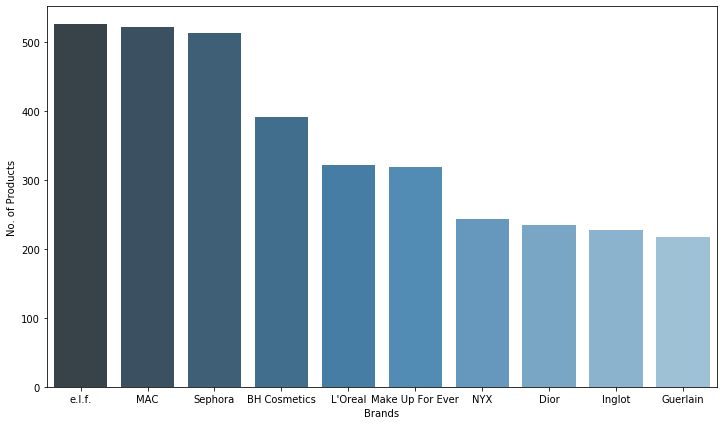

In [122]:
plt.figure(figsize=(12,7))
sns.barplot(x="brand", y="product_type", data=top_10_brands, palette="Blues_d").set(xlabel='Brands', ylabel='No. of Products')

### Top 3 companies and the most popular product types in each company

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'E.L.F')]

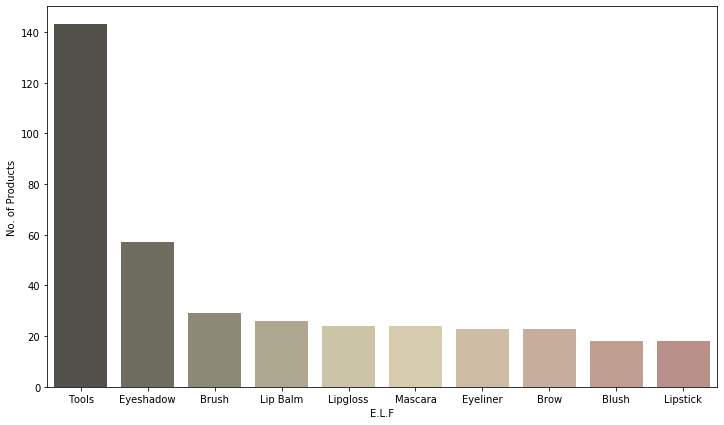

In [123]:
elf_10_pt = final_df[final_df['brand']=='e.l.f.'].groupby('product_type').size().sort_values(ascending=False).nlargest(10)
elf_10_pt = elf_10_pt.reset_index()
elf_10_pt.rename(columns={0: "Count"}, inplace=True)
elf_10_pt
plt.figure(figsize=(12,7))
sns.barplot(x="product_type", y="Count", data=elf_10_pt, palette="pink_d").set(xlabel='E.L.F', ylabel='No. of Products')

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'Brands')]

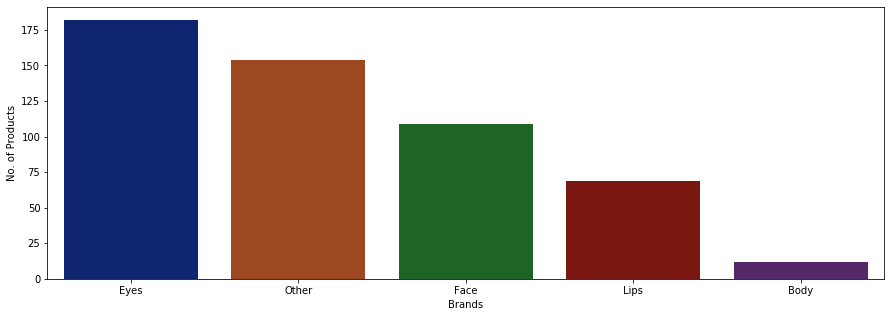

In [124]:
elf_cat = final_df[final_df['brand']=='e.l.f.'].groupby('category').size().sort_values(ascending=False)
elf_cat = elf_cat.reset_index()
elf_cat.rename(columns={0: "Count"}, inplace=True)
elf_cat.columns
plt.figure(figsize=(15,5))
sns.barplot(x='category', y="Count", data=elf_cat, palette="dark").set(xlabel='Brands', ylabel='No. of Products')

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'MAC')]

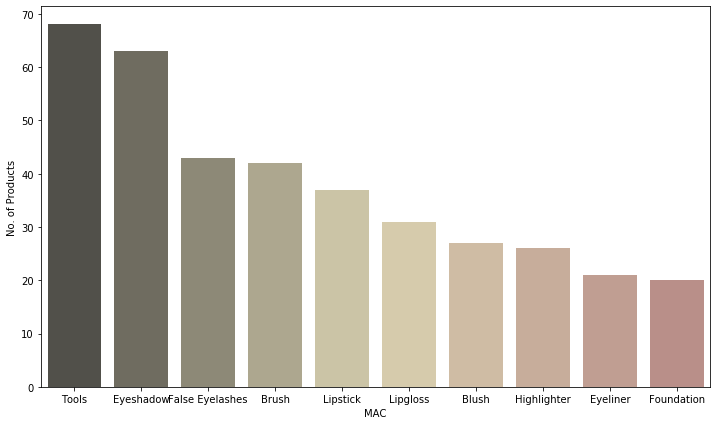

In [125]:
mac_10_pt = final_df[final_df['brand']=='MAC'].groupby('product_type').size().sort_values(ascending=False).nlargest(10)
mac_10_pt = mac_10_pt.reset_index()
mac_10_pt.rename(columns={0: "Count"}, inplace=True)
mac_10_pt
plt.figure(figsize=(12,7))
sns.barplot(x="product_type", y="Count", data=mac_10_pt, palette="pink_d").set(xlabel='MAC', ylabel='No. of Products')

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'Brands')]

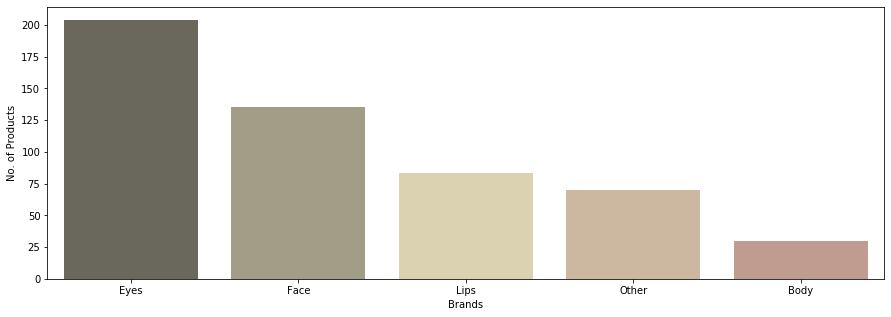

In [126]:
mac_cat = final_df[final_df['brand']=='MAC'].groupby('category').size().sort_values(ascending=False)
mac_cat = mac_cat.reset_index()
mac_cat.rename(columns={0: "Count"}, inplace=True)
mac_cat
plt.figure(figsize=(15,5))
sns.barplot(x="category", y="Count", data=mac_cat, palette="pink_d").set(xlabel='Brands', ylabel='No. of Products')

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'Sephora')]

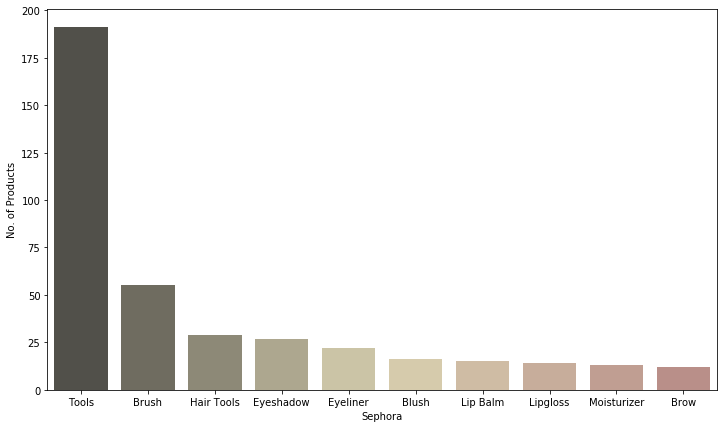

In [127]:
sephora_10_pt = final_df[final_df['brand']=='Sephora'].groupby('product_type').size().sort_values(ascending=False).nlargest(10)
sephora_10_pt = sephora_10_pt.reset_index()
sephora_10_pt.rename(columns={0: "Count"}, inplace=True)
sephora_10_pt

plt.figure(figsize=(12,7))
sns.barplot(x="product_type", y="Count", data=sephora_10_pt, palette="pink_d").set(xlabel='Sephora', ylabel='No. of Products')

[Text(0, 0.5, 'No. of Products'), Text(0.5, 0, 'Brands')]

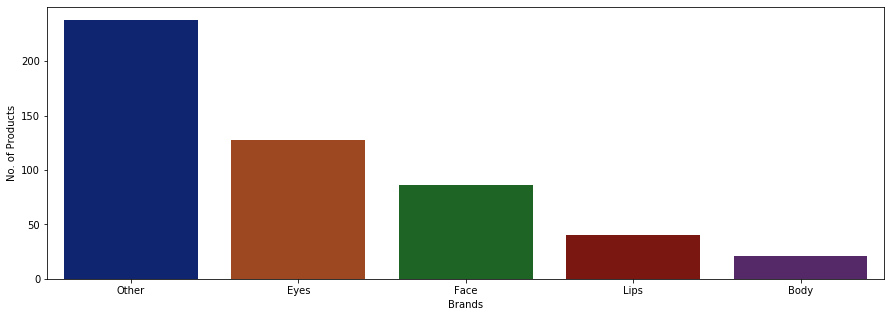

In [128]:
sephora_cat = final_df[final_df['brand']=='Sephora'].groupby('category').size().sort_values(ascending=False)
sephora_cat = sephora_cat.reset_index()
sephora_cat.rename(columns={0: "Count"}, inplace=True)
sephora_cat
plt.figure(figsize=(15,5))
sns.barplot(x="category", y="Count", data=sephora_cat, palette="dark").set(xlabel='Brands', ylabel='No. of Products')

## Wordcloud

In [129]:
from collections import Counter
Counter(" ".join(final_df["name"]).split()).most_common(10)

[('Brush', 1266),
 ('Lip', 693),
 ('Powder', 651),
 ('Eye', 607),
 ('SPF', 594),
 ('Eyeshadow', 587),
 ('Foundation', 457),
 ('Blush', 419),
 ('Palette', 414),
 ('&', 349)]

In [130]:
final_df.groupby('brand').count().sort_values(by= 'name', axis=0, ascending=True) 

,name,product_type,description,category
brand,,,,
Miessence,1,1,1,1
Nicole by OPI,1,1,1,1
Crabtree and Evelyn,1,1,1,1
Pureology,1,1,1,1
CoverDerm,1,1,1,1
Gorgeous Cosmetics,1,1,1,1
Queen Helene,1,1,1,1
Coty,1,1,1,1
Conair,1,1,1,1


### Highest 3 companies | SIDE BY SIDE GRAPHS

In [131]:
# elf
tuples = [tuple(x) for x in elf_cat.values]
elf_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
elf_count = list(map(lambda elm: elm[1], elf_count_tups))
print(elf_count)
# sephora
tuples = [tuple(x) for x in sephora_cat.values]
sepohra_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
sepohra_count = list(map(lambda elm: elm[1], sepohra_count_tups))
print(sepohra_count)
# mac
tuples = [tuple(x) for x in mac_cat.values]
mac_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
mac_count = list(map(lambda elm: elm[1], mac_count_tups))
print(mac_count)

[12, 182, 109, 69, 154]
[21, 128, 86, 40, 238]
[30, 204, 135, 83, 70]


In [132]:
dfs = pd.DataFrame(data={'category': ['Body','Eyes', 'Face', 'Lips', 'Other'], 'ELF': elf_count, 
'Sephora': sepohra_count, 'MAC': mac_count})


/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

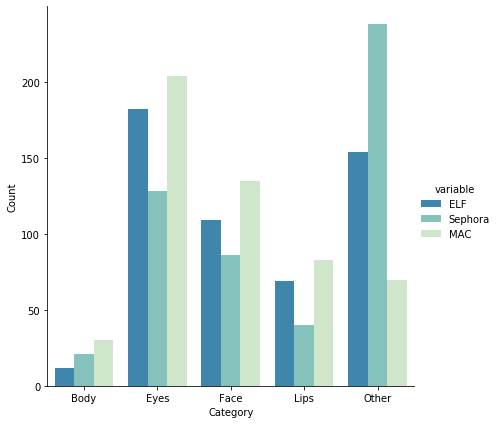

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
dfs1 = pd.melt(dfs, id_vars = "category")
plt.figure()
sns.factorplot(x = 'category', y='value', hue = 'variable', palette="GnBu_r", data=dfs1, kind='bar', size=6).set(xlabel='Category', ylabel='Count')

### Medium size 3 companies | Side By Side Graph

[Text(0, 0.5, 'No. of Items'), Text(0.5, 0, 'Category in Make Up For Ever')]

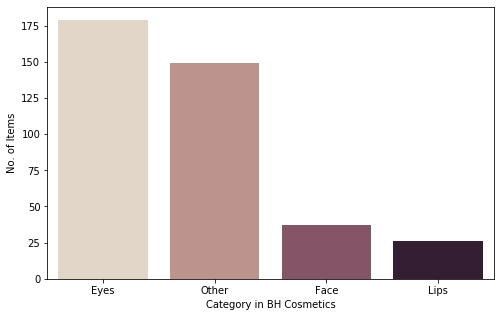

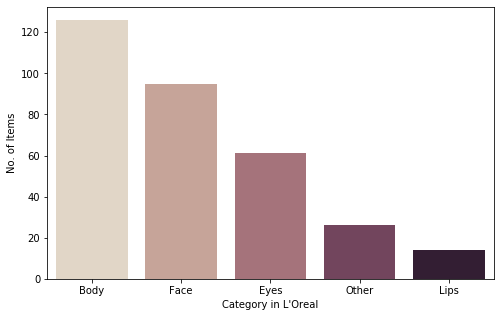

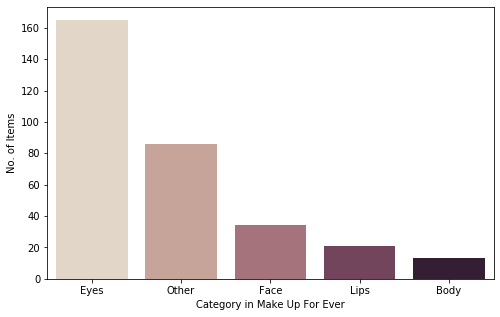

In [134]:
# BH Cosmetics
bh_cat = final_df[final_df['brand']=='BH Cosmetics'].groupby('category').size().sort_values(ascending=False).reset_index()
bh_cat.rename(columns={0: "Count"}, inplace=True)
#print(bh_cat)
plt.figure(figsize=(8,5))
sns.barplot(x="category", y="Count", data=bh_cat, palette="ch:.25").set(xlabel='Category in BH Cosmetics', ylabel='No. of Items')
# L'Oreal
lo_cat = final_df[final_df['brand']=="L'Oreal"].groupby('category').size().sort_values(ascending=False).reset_index()
lo_cat.rename(columns={0: "Count"}, inplace=True)
#print(lo_cat)
plt.figure(figsize=(8,5))
sns.barplot(x="category", y="Count", data=lo_cat, palette="ch:.25").set(xlabel="Category in L'Oreal", ylabel='No. of Items')
# Make Up For Ever
me_cat = final_df[final_df['brand']=='Make Up For Ever'].groupby('category').size().sort_values(ascending=False).reset_index()
me_cat.rename(columns={0: "Count"}, inplace=True)
#print(me_cat)
plt.figure(figsize=(8,5))
sns.barplot(x="category", y="Count", data=me_cat, palette="ch:.25").set(xlabel='Category in Make Up For Ever', ylabel='No. of Items')

### Smaller Companies

In [135]:
#NYX Cosmetics CATEGORY
nyx_cat = final_df[final_df['brand']=="NYX"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
nyx_cat.rename(columns={0: "Count"}, inplace=True)
print(nyx_cat)

#Dior Cosmetics CATEGORY
dior_cat = final_df[final_df['brand']=="Dior"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
dior_cat.rename(columns={0: "Count"}, inplace=True)
print(dior_cat)

#Inglot CATEGORY
in_cat = final_df[final_df['brand']=="Inglot"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
in_cat.rename(columns={0: "Count"}, inplace=True)
print(in_cat)

#Guerlain Cosmetics CATEGORY
g_cat = final_df[final_df['brand']=="Guerlain"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
g_cat.rename(columns={0: "Count"}, inplace=True)
print(g_cat)

#Revlon Cosmetics CATEGORY
r_cat = final_df[final_df['brand']=="Revlon"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
r_cat.rename(columns={0: "Count"}, inplace=True)
print(r_cat)

#Lancome Cosmetics CATEGORY
l_cat = final_df[final_df['brand']=="Lancome"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
l_cat.rename(columns={0: "Count"}, inplace=True)
print(l_cat)


  category  Count
0     Eyes    109
1     Face     46
2    Other     43
3     Lips     32
4     Body     14
  category  Count
0     Face     77
1     Body     58
2     Eyes     46
3    Other     28
4     Lips     26
  category  Count
0     Eyes    114
1    Other     49
2     Face     29
3     Body     20
4     Lips     15
  category  Count
0     Face     84
1     Body     73
2     Eyes     25
3     Lips     23
4    Other     13
  category  Count
0    Other     62
1     Eyes     56
2     Face     41
3     Body     31
4     Lips     21
  category  Count
0     Face     76
1     Eyes     43
2    Other     34
3     Body     34
4     Lips     22


In [136]:
#NYX Cosmetics CATEGORY
tuples = [tuple(x) for x in nyx_cat.values]
nyx_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
nyx_count = list(map(lambda elm: elm[1], nyx_count_tups))
print(nyx_count)
#Dior Cosmetics CATEGORY
tuples = [tuple(x) for x in dior_cat.values]
dior_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
dior_count = list(map(lambda elm: elm[1], dior_count_tups))
print(dior_count)
#Inglot CATEGORY
tuples = [tuple(x) for x in in_cat.values]
in_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
in_count = list(map(lambda elm: elm[1], in_count_tups))
print(in_count)
#Guerlain Cosmetics CATEGORY
tuples = [tuple(x) for x in g_cat.values]
g_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
g_count = list(map(lambda elm: elm[1], g_count_tups))
print(g_count)
#Revlon Cosmetics CATEGORY
tuples = [tuple(x) for x in r_cat.values]
r_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
r_count = list(map(lambda elm: elm[1], r_count_tups))
print(r_count)
#Lancome Cosmetics CATEGORY
tuples = [tuple(x) for x in l_cat.values]
l_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
l_count = list(map(lambda elm: elm[1], l_count_tups))
print(l_count)

[14, 109, 46, 32, 43]
[58, 46, 77, 26, 28]
[20, 114, 29, 15, 49]
[73, 25, 84, 23, 13]
[31, 56, 41, 21, 62]
[34, 43, 76, 22, 34]


In [137]:
dfs_2 = pd.DataFrame(data={'category': ['Body','Eyes', 'Face', 'Lips', 'Other'], 
                           'NYX': nyx_count, 
                           "Dior": dior_count,
                           'Inglot': in_count,
                           'Guerlain': g_count, 
                           "Revlon": r_count,
                           'Lancome': l_count })

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


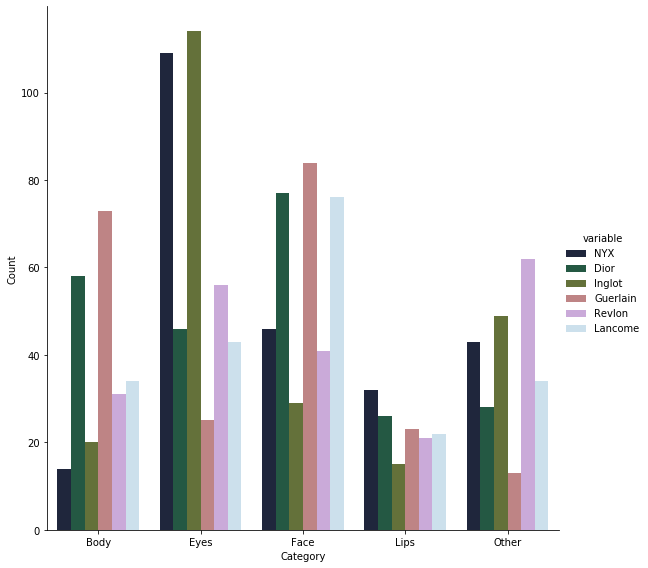

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt
dfs_3 = pd.melt(dfs_2, id_vars = "category")
#plt.figure(figsize=(5,5))
sns.factorplot(x = 'category', y='value', hue = 'variable', palette="cubehelix", data=dfs_3, kind='bar', size=8).set(xlabel='Category', ylabel='Count')

### Drugstore vs Highend Makeup

In [139]:
#L'Oreal Cosmetics CATEGORY
tuples = [tuple(x) for x in lo_cat.values]
lo_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
lo_count = list(map(lambda elm: elm[1], lo_count_tups))
print(lo_count)

[126, 61, 95, 14, 26]


In [140]:
#Drugstore 

dfs_3 = pd.DataFrame(data={'category': ['Body','Eyes', 'Face', 'Lips', 'Other'], 
                           'NYX': nyx_count, 
                           "elf": elf_count,
                           'Sephora': sepohra_count,
                           "L'Oreal": lo_count, 
                           "Revlon": r_count})

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


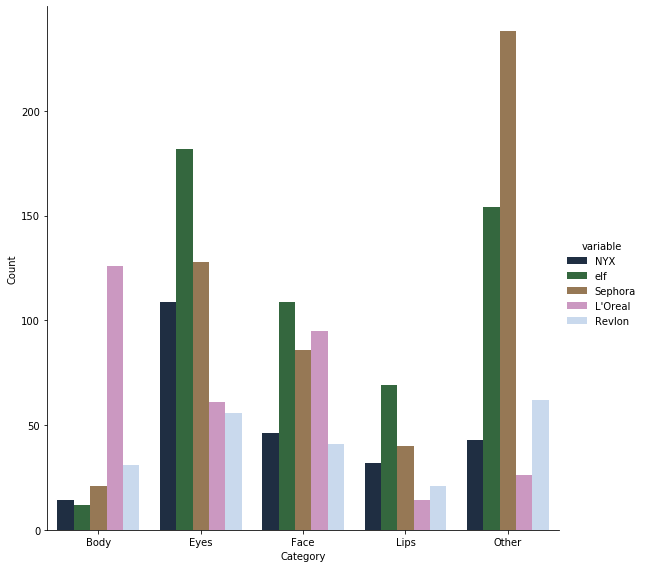

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
dfs_4 = pd.melt(dfs_3, id_vars = "category")
#plt.figure(figsize=(5,5))
sns.factorplot(x = 'category', y='value', hue = 'variable', palette="cubehelix", data=dfs_4, kind='bar', size=8).set(xlabel='Category', ylabel='Count')

In [142]:
#Chanel CATEGORY
c_cat = final_df[final_df['brand']=="Chanel"].groupby('category').size().sort_values(ascending=False).nlargest(6).reset_index()
c_cat.rename(columns={0: "Count"}, inplace=True)
print(c_cat)

#Chanel CATEGORY
tuples = [tuple(x) for x in c_cat.values]
c_count_tups = (sorted(tuples, key=lambda elem: elem[0]))
c_count = list(map(lambda elm: elm[1], c_count_tups))
print(c_count)

  category  Count
0     Face     77
1     Eyes     50
2    Other     21
3     Body     20
4     Lips     18
[20, 50, 77, 18, 21]


In [143]:
#Highend 

dfs_5 = pd.DataFrame(data={'category': ['Body','Eyes', 'Face', 'Lips', 'Other'], 
                           'MAC': mac_count, 
                           'Dior': dior_count,
                           "Guerlain": g_count, 
                           "Lancome": l_count,
                          "Chanel": c_count})

/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/nirugidla/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


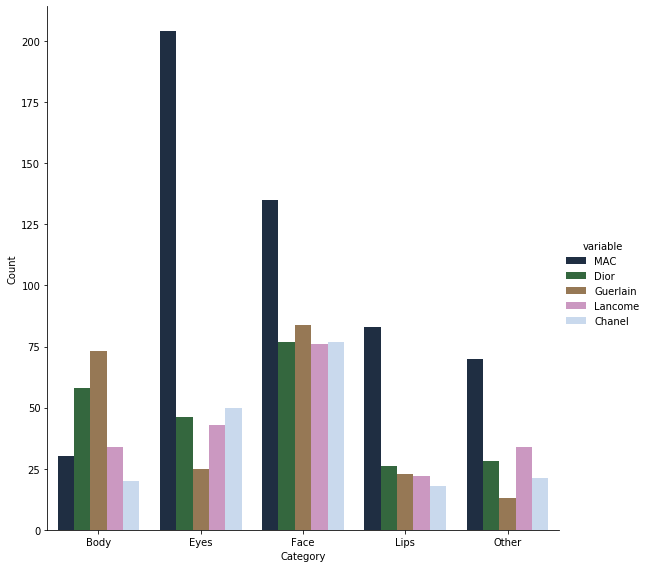

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
dfs_6 = pd.melt(dfs_5, id_vars = "category")
#plt.figure(figsize=(5,5))
sns.factorplot(x = 'category', y='value', hue = 'variable', palette="cubehelix", data=dfs_6, kind='bar', size=8).set(xlabel='Category', ylabel='Count')